<a href="https://colab.research.google.com/github/ano74/BCS_Drowsiness_Detection/blob/main/BCI_Classification_Anupama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Desription of the dataset

Continuous signals of 59 EEG channels and, for the calibration data, markers that indicate the time points of cue presentation and the corresponding target classes.

In [ ]:
%matplotlib inline

#importing dependencies

import numpy as np
from scipy.io import loadmat #to load .mat files
import mne

In [ ]:
path = '/content/drive/MyDrive/BCS_drowsiness_detection/mat2mne.mat'
data = loadmat(path)
type(data)

dict

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [ ]:
#Loading eeg data
eeg_data = data['cnt'].T
eeg_data.shape

(59, 190594)

In [ ]:
eeg_data

array([[  -3,  -25,  -34, ..., 2524, 2561, 2606],
       [  -3,  -21,  -15, ..., 2672, 2706, 2759],
       [  -3,  -26,  -52, ..., 2347, 2385, 2457],
       ...,
       [   2,   19,   37, ..., 1167, 1249, 1366],
       [   7,   60,  130, ..., 1620, 1693, 1838],
       [   5,   45,   98, ..., 1205, 1210, 1263]], dtype=int16)

In [ ]:
inf = data['nfo']

In [ ]:
sampling_rate = inf['fs'][0][0][0][0]
sampling_rate

100

In [ ]:
j=0
ch_names=[]
while j<59:
  ch_names.append(inf['clab'][0][0][0][j][0])
  j+=1
ch_names

['AF3',
 'AF4',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'CFC7',
 'CFC5',
 'CFC3',
 'CFC1',
 'CFC2',
 'CFC4',
 'CFC6',
 'CFC8',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'CCP7',
 'CCP5',
 'CCP3',
 'CCP1',
 'CCP2',
 'CCP4',
 'CCP6',
 'CCP8',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'PO1',
 'PO2',
 'O1',
 'O2']

In [ ]:
#Creating sensor information object

xpos = inf['xpos'][0, 0].flatten()
ypos = inf['ypos'][0, 0].flatten()
xpos
positions = np.vstack([xpos, ypos, np.zeros(len(ch_names))]).T
positions.shape
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names, positions)), coord_frame="head")

In [ ]:
#Creating info object

info = mne.create_info(ch_names=ch_names,
                       sfreq=sampling_rate,
                       ch_types='eeg',
                       )
info.set_montage(montage)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,62 points
Good channels,59 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


In [ ]:
eeg_data = eeg_data*10e-9

Creating RawArray with float64 data, n_channels=59, n_times=190594
    Range : 0 ... 190593 =      0.000 ...  1905.930 secs
Ready.


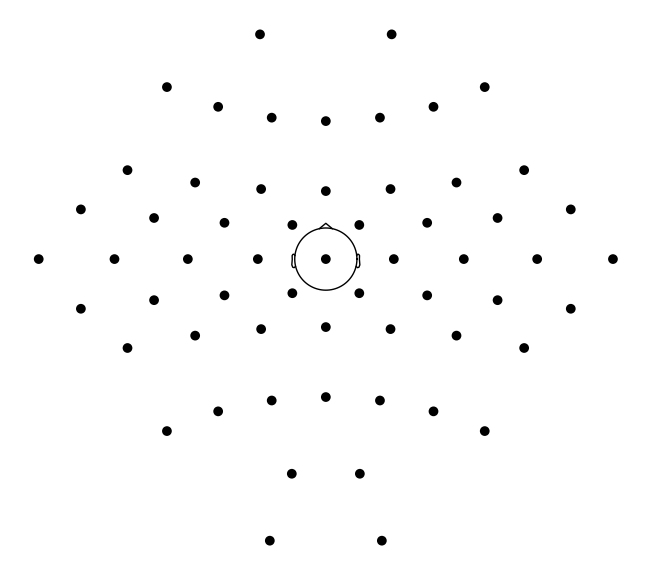

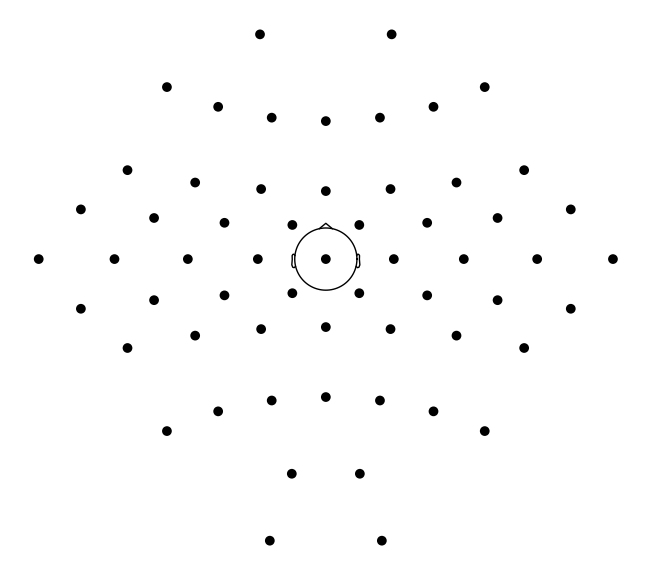

In [ ]:
#Creating a raw object and plotting sensor topography
raw = mne.io.RawArray(eeg_data, info)
raw.plot_sensors()

In [ ]:
events = np.column_stack((np.array(data['mrk']['pos'][0][0][0], dtype=int), np.zeros(len(data['mrk']['pos'][0][0][0]), dtype=int), np.array(data['mrk']['y'][0][0][0], dtype=int)))
events

array([[  2091,      0,      1],
       [  2891,      0,      1],
       [  3691,      0,     -1],
       [  4491,      0,      1],
       [  5291,      0,      1],
       [  6091,      0,      1],
       [  6891,      0,      1],
       [  7692,      0,     -1],
       [  8492,      0,     -1],
       [  9292,      0,      1],
       [ 10092,      0,     -1],
       [ 10892,      0,      1],
       [ 11692,      0,     -1],
       [ 12492,      0,     -1],
       [ 13292,      0,     -1],
       [ 16294,      0,      1],
       [ 17094,      0,     -1],
       [ 17894,      0,     -1],
       [ 18694,      0,      1],
       [ 19494,      0,     -1],
       [ 20294,      0,      1],
       [ 21094,      0,      1],
       [ 21894,      0,     -1],
       [ 22694,      0,     -1],
       [ 23494,      0,     -1],
       [ 24294,      0,     -1],
       [ 25094,      0,     -1],
       [ 25894,      0,      1],
       [ 26694,      0,     -1],
       [ 27494,      0,     -1],
       [ 3

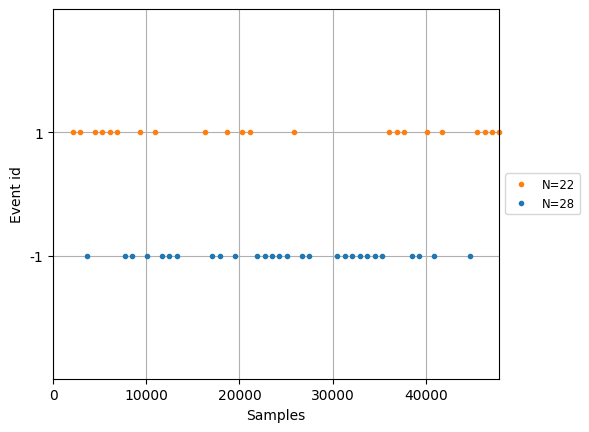

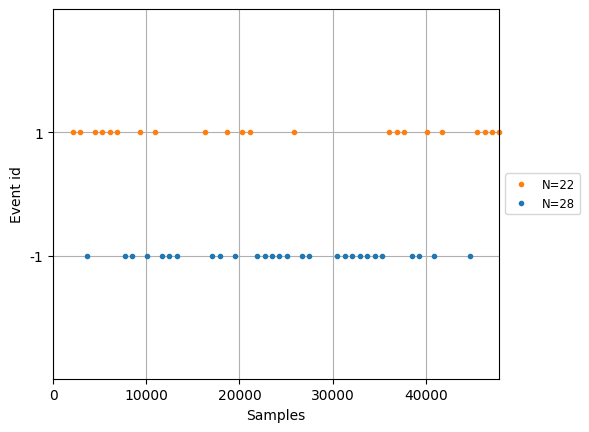

In [ ]:
mne.viz.plot_events(events[:50])

In [ ]:
event_ids = {"left": -1, "right": 1}
epochs = mne.Epochs(raw, events, event_id = event_ids, preload = True)
epochs.apply_baseline((None,0))

Not setting metadata
200 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 200 events and 71 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


Number of events,200
Events,left: 100right: 100
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


### Creating an evoked object

In [ ]:
left = epochs["left"].average()
right = epochs["right"].average()
left, right

(<Evoked | 'left' (average, N=100), -0.2 – 0.5 s, baseline -0.2 – 0 s, 59 ch, ~117 kB>,
 <Evoked | 'right' (average, N=100), -0.2 – 0.5 s, baseline -0.2 – 0 s, 59 ch, ~117 kB>)

In [ ]:
dir(left)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aspect_kind',
 '_data',
 '_decim',
 '_get_channel_positions',
 '_handle_tmin_tmax',
 '_pick_drop_channels',
 '_pick_projs',
 '_projector',
 '_raw_times',
 '_reconstruct_proj',
 '_repr_html_',
 '_set_channel_positions',
 '_set_legacy_nfft_default',
 '_set_times',
 '_size',
 '_times_readonly',
 '_update_first_last',
 'add_channels',
 'add_proj',
 'add_reference_channels',
 'animate_topomap',
 'anonymize',
 'apply_baseline',
 'apply_function',
 'apply_hilbert',
 'apply_proj',
 'as_type',
 'baseline',
 'ch_names',
 'comment',
 'compensation_grade',
 'compute_psd',
 'compute_tfr

### Plots of evoked object 'left'



1. Plot of all channels

No projector specified for this dataset. Please consider the method self.add_proj.


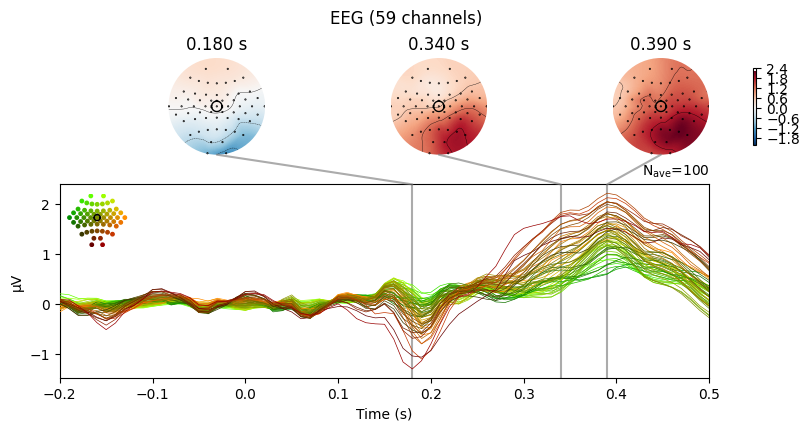

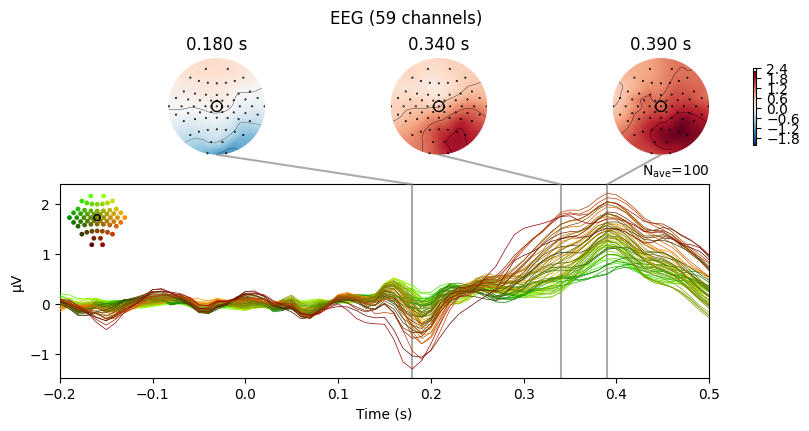

In [ ]:
left.plot_joint()

2. Power Spectral Density plot

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


<ipython-input-450-f145eefc2277>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  left.plot_psd()


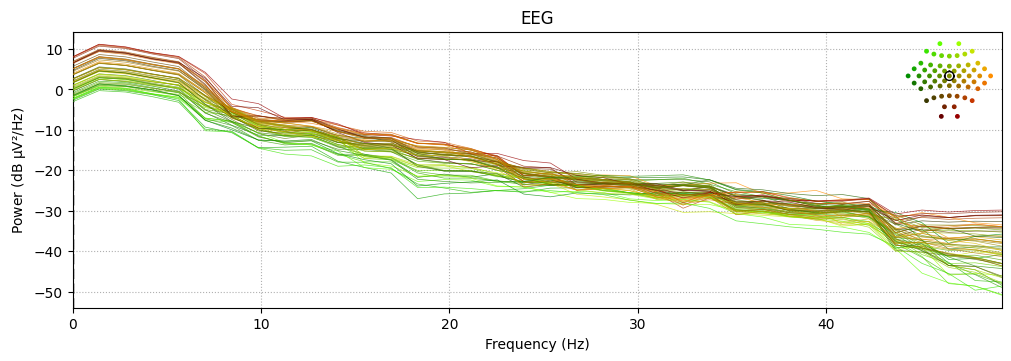

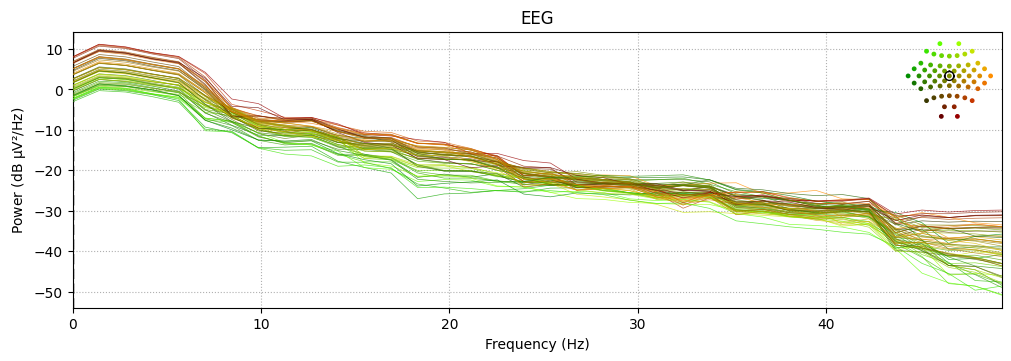

In [ ]:
left.plot_psd()

3. Plot of amplitude of each channel

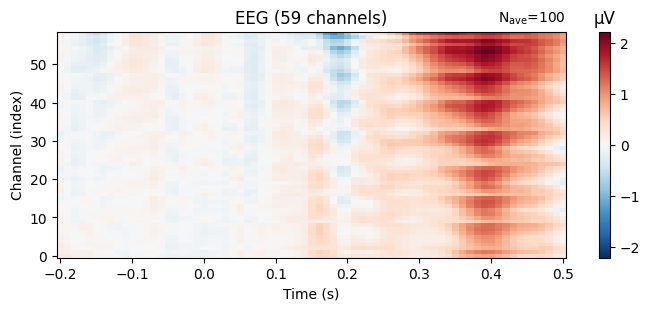

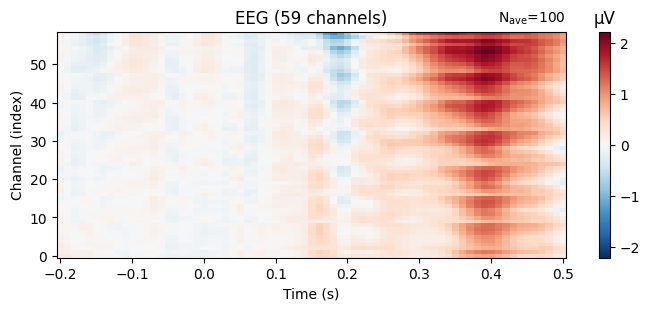

In [ ]:
left.plot_image()

4. Topomap of amplitudes at different times

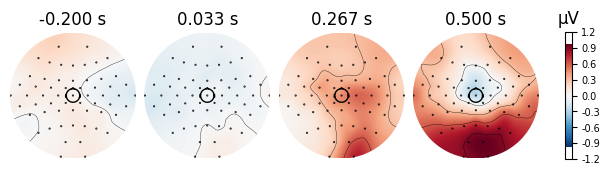

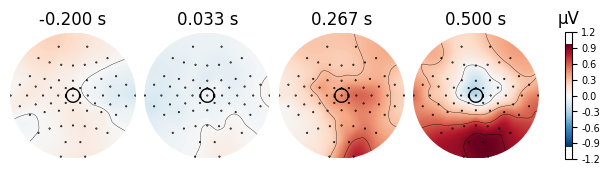

In [ ]:
left.plot_topomap()

### Time Frequency Analysis

TFR is a plot of the intensity of each frequency in a specific time interval. We use it to study what kind of waves are dominant at a given time.

1. Plot of the psd of frequecies between 0 and 40 Hz

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-453-7beb9538c026>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.plot_psd(fmin=2, fmax=40)


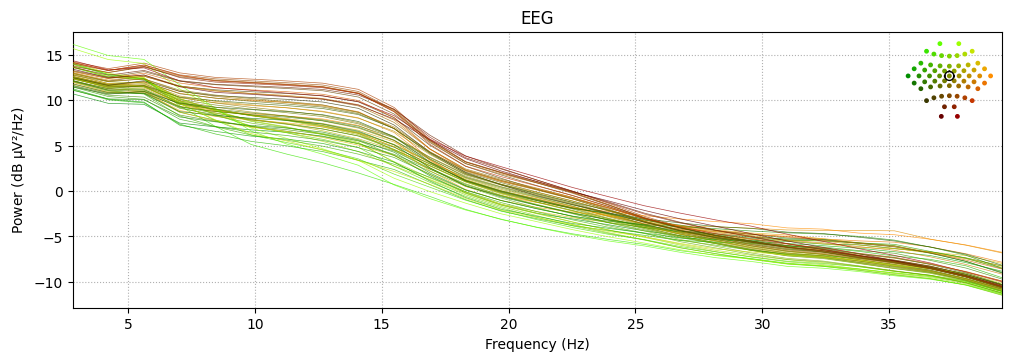

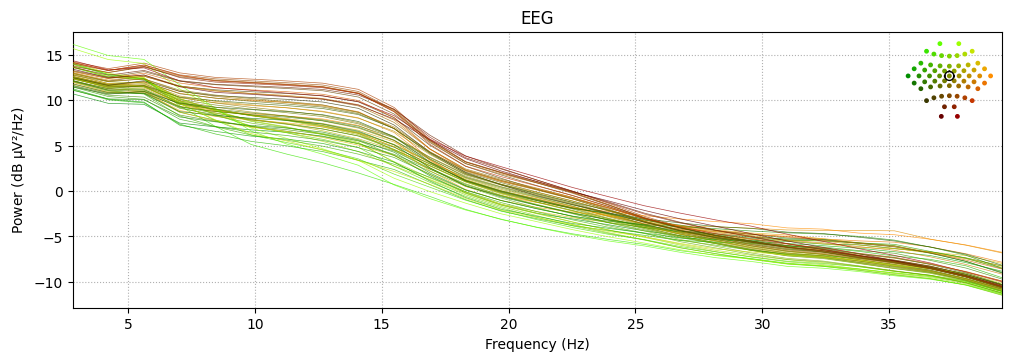

In [ ]:
epochs.plot_psd(fmin=2, fmax=40)

In [ ]:
#TFR analysis performed using tfr_morlet on both left and right eeg

from mne.time_frequency import tfr_morlet
freqs = list(range(3,30))
tfr_left = tfr_morlet(epochs["left"], freqs, 1, return_itc = False)
tfr_right = tfr_morlet(epochs["right"], freqs, 1, return_itc = False)

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


2. Plot of tfr of 'F5' electrode during left hand movement

No baseline correction applied


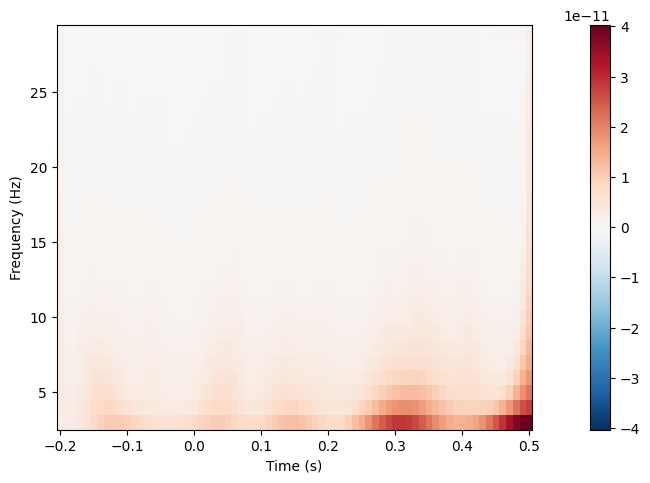

'F5'

In [ ]:
tfr_left.plot(picks=2)
ch_names[2]

3. Plot of tfr of 'F5' electrode during right hand movement

No baseline correction applied


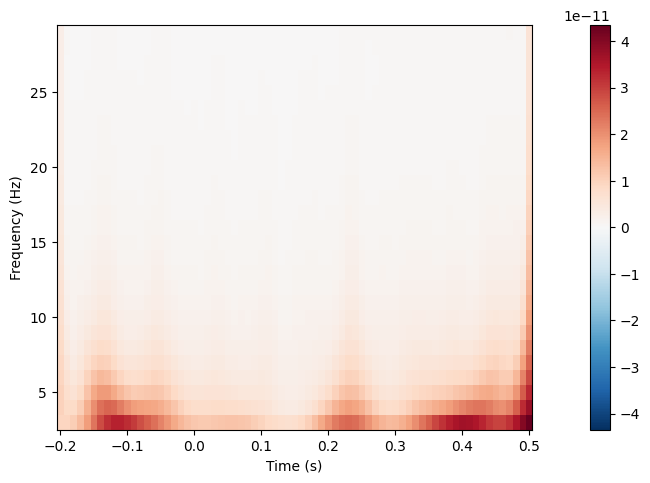

[<Figure size 640x480 with 2 Axes>]

In [ ]:
tfr_right.plot(picks=2)

In [ ]:
tfr_contrast = mne.combine_evoked((tfr_left, tfr_right), (-1, 1))  #Subtracting tfr_left from tfr_right to analyse the difference
tfr_contrast.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Data type,Average Power Estimates
Data source,Epochs
Number of epochs,59
Dims,"channel, freq, time"
Estimation method,morlet
Number of channels,59
Number of timepoints,71
Number of frequency bins,27
Frequency range,3.00 – 29.00 Hz


4. Contrast in tfr of the 'C1' channel

No baseline correction applied


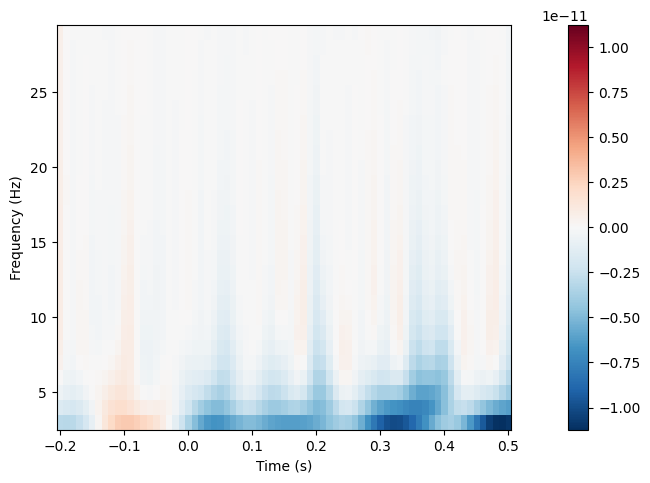

'C1'

In [ ]:
tfr_contrast.plot(picks=[27])
ch_names[27]